# The residuals plot in the paper.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec

import kepler_kinematics as kek
from scipy.stats import multivariate_normal

plotpar = {'axes.labelsize': 16,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
# df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")
df = pd.read_csv("../data/data.csv")

Load the results file.

In [4]:
# results = pd.read_csv("../data/all_kepler4.csv")
results = pd.read_csv("../data/edr3_all.csv")

In [5]:
results

,Unnamed: 0,Unnamed: 0.1,kepid,vx_inferred,vx_inferred_errp,vx_inferred_errm,vx_inferred_err,vx_random,vy_inferred,vy_inferred_errp,...,vxvx_covar,vxvy_covar,vxvz_covar,vxlnd_covar,vyvy_covar,vyvz_covar,vylnd_covar,vzvz_covar,vzlnd_covar,lndlnd_covar
0,0,0,7132078,149.897941,4.739667,4.625091,4.721207,155.504197,217.008044,18.018588,...,22.295371,82.885134,14.153683,0.014523,342.318709,57.994196,-0.003836,9.834125,0.000124,0.000107
1,0,0,10591921,54.178398,3.324511,3.470299,3.489152,52.012670,220.981045,16.707756,...,12.177225,57.086684,17.046223,0.019192,289.641308,85.984152,-0.003067,25.552926,0.001208,0.000430
2,0,0,7130963,108.744522,7.543210,7.139660,7.289899,112.901083,213.498441,18.856482,...,53.155921,79.028446,19.516722,0.323312,332.676269,56.831128,-0.025085,10.860350,0.053505,0.003169
3,0,0,11450155,39.448084,2.938416,2.961133,2.943596,39.948906,222.454981,17.493335,...,8.666922,51.187051,15.365172,0.002744,304.724037,91.368282,0.003456,27.402720,0.001603,0.000071
4,0,0,5002215,4.480696,5.821486,5.908318,5.946607,3.537490,219.738516,17.718298,...,35.370981,107.196464,25.469050,-0.000967,324.914247,77.196439,-0.002951,18.371925,0.001128,0.000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,0,0,9071529,-2.872809,4.466299,4.347571,4.453653,-3.836944,219.545889,16.890061,...,19.839981,74.919525,26.237558,-0.000020,282.994980,99.128835,0.001659,34.733402,0.001234,0.000052
6252,0,0,7581535,138.977154,6.913825,7.375109,7.251315,122.186545,225.569627,17.024193,...,52.594724,89.964920,32.097159,0.179476,289.918445,110.702032,-0.021074,42.544256,-0.025150,0.001408
6253,0,0,4269766,115.482420,6.780262,6.736157,6.693560,112.403877,218.877093,18.485804,...,44.814950,104.953095,16.830345,0.106238,333.277850,57.811876,0.002425,10.213467,-0.011928,0.000949
6254,0,0,2714955,0.642340,6.089424,6.097029,6.262481,5.296345,225.668021,17.488222,...,39.228473,111.684427,20.455275,-0.004775,318.332157,58.296266,-0.003212,10.694744,-0.001572,0.000710


Merge the results file and the data file.

In [6]:
adf = pd.merge(df, results, on="kepid", how="right")

In [7]:
def resid_plot(vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, vz_inferred_err,
               lndistance_inferred_err, r_est, lndistance_inferred,
               ms=3, alpha=.1, box_size=120):

    fig = plt.figure(figsize=(16, 6), dpi=200)
#     gs = gridspec.GridSpec(2, 3, hspace=.0, wspace=.3, height_ratios=[1, 1])
    gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

    ax0 = plt.subplot(gs[0, 0])
    xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
    ax0.plot(vx, vx_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(xlims[0], xlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax0.set_ylim(xlims)
    ax0.set_xlim(xlims)
    ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
    ax0.set_xticklabels([])

    ax1 = plt.subplot(gs[0, 1])
    ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
    ax1.plot(vy, vy_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(ylims[0], ylims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax1.set_xlim(ylims)
    ax1.set_ylim(ylims)
    ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
    ax1.set_xticklabels([])

    ax2 = plt.subplot(gs[0, 2])
    zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
    ax2.plot(vz, vz_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(zlims[0], zlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax2.set_xlim(zlims)
    ax2.set_ylim(zlims)
    ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
    ax2.set_xticklabels([])

    ax6 = plt.subplot(gs[0, 3])
    ax6.plot(r_est, lndistance_inferred, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
#     ax6.errorbar(r_est, lndistance_inferred, fmt="k.", yerr=lndistance_inferred_err, ms=ms+2,
#                  mec="none", alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(0, 10, 100)
    ax6.plot(xs, xs, "k", ls="--", zorder=1)
    ax6.set_xlim(0, 10)
    ax6.set_ylim(0, 10)
    ax6.set_ylabel("$\mathrm{\ln(D/Kpc)~inferred}$")
    ax6.set_xticklabels([])
    
    # Residual panels
    # ---------------------------------------------------------------------------------------------------
    
    ax3 = plt.subplot(gs[1, 0])
#     ax3.errorbar(vx, vx_inferred - vx, yerr=vx_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.plot(vx, vx_inferred - vx, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", ms=4, label="$\mathrm{Typical~uncertainty}$")
    ax3.axhline(0, color="k", ls="--", zorder=1)
    ax3.set_ylim(-box_size, box_size)
    ax3.set_xlim(xlims)
    ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
#     ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax3.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")
    ax3.legend(fontsize=13)

    ax4 = plt.subplot(gs[1, 1])
#     ax4.errorbar(vy, vy_inferred-vy, yerr=vy_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.plot(vy, vy_inferred-vy, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.", ms=4)
    ax4.axhline(0, color="k", ls="--", zorder=1)
    ax4.set_ylim(-box_size, box_size)
    ax4.set_xlim(ylims)
    ax4.set_xlabel("$\mathrm{V_y~true~[kms^{-1}]}$")
#     ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax4.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax5 = plt.subplot(gs[1, 2])
#     ax5.errorbar(vz, vz_inferred - vz, yerr=vz_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.plot(vz, vz_inferred - vz, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.", ms=4)
    print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
    ax5.axhline(0, color="k", ls="--", zorder=1)
    ax5.set_ylim(-box_size, box_size)
    ax5.set_xlim(zlims)
    ax5.set_xlabel("$\mathrm{V_z~true~[kms^{-1}]}$")
#     ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax5.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax7 = plt.subplot(gs[1, 3])
#     ax7.errorbar(r_est, lndistance_inferred-r_est, fmt="k.", yerr=lndistance_inferred_err, ms=ms+2,
#                  mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.plot(r_est, lndistance_inferred-r_est, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.errorbar(0, -.1, yerr=np.median(lndistance_inferred_err), fmt="k.", ms=4)
    ax7.axhline(0, color="k", ls="--", zorder=1)
    ax7.set_ylim(-.5, .5)
    ax7.set_xlabel("$\mathrm{Distance~true~[kpc]}$")
    ax7.set_ylabel("$\mathrm{Inferred-True~[kpc]}$")
        
    return fig

typical vz uncertainty =  4.134654713250277 -5.376933690795567


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


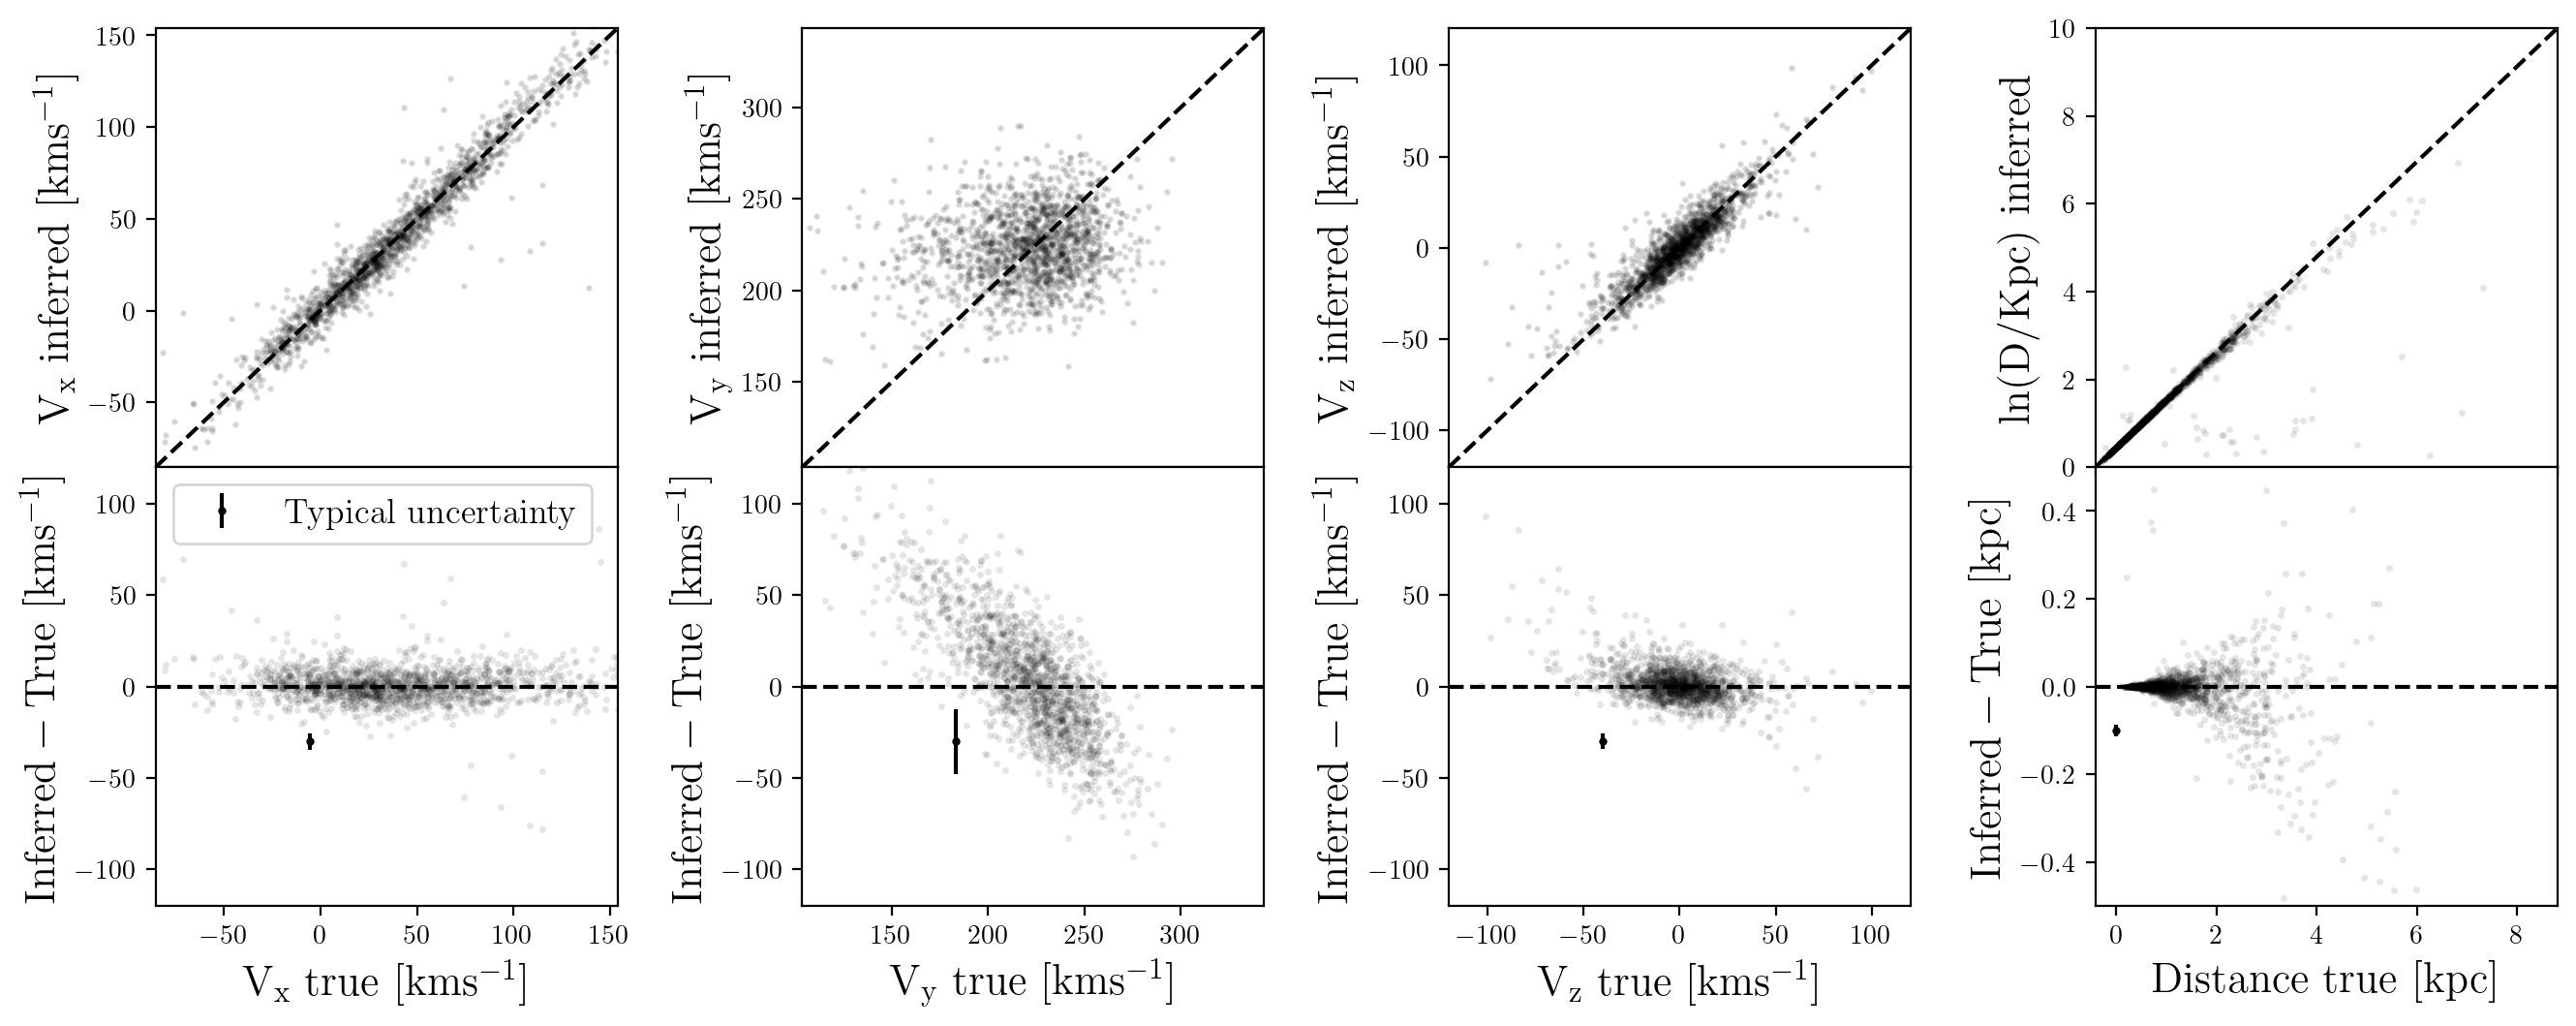

In [8]:
m = np.isfinite(adf.vx.values) & np.isfinite(adf.vy.values) & np.isfinite(adf.vz.values)
m &= np.isfinite(adf.vx_random.values) & np.isfinite(adf.vy_random.values) & np.isfinite(adf.vz_random.values) \
    & np.isfinite(adf.lndistance_random.values)

fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_random.values[m],
                 adf.vy_random.values[m], adf.vz_random.values[m],
                 adf.vx_inferred_err.values[m], adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
                 adf.lndistance_inferred_err.values[m],
                 adf.r_med_photogeo.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))
#                  1./adf.parallax_uncorr.values[m], np.exp(adf.lndistance_random.values[m]))
#                  adf.r_med_photogeo.values[m]*1e-3, 1./adf.parallax.values[m])
#                  adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))


plt.tight_layout()
plt.savefig("../plots/residuals")
plt.savefig("../paper/residuals.pdf")

(0.0, 6.0)

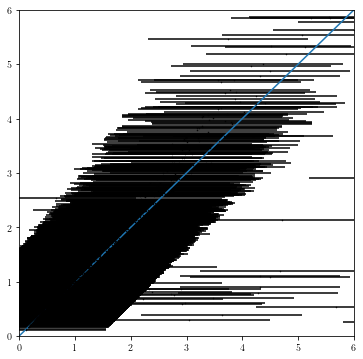

In [88]:
plt.figure(figsize=(6, 6))
# plt.plot(1./adf.parallax_uncorr.values[m], np.exp(adf.lndistance_random.values[m]), "k.", ms=1)
# plt.plot(adf.r_med_photogeo.values[m]*1e-3, 1./adf.parallax.values[m], "k.", ms=1)
plt.errorbar(adf.r_med_photogeo.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]),
             xerr=np.mean([adf.r_lo_photogeo.values[m]*1e-3, adf.r_hi_photogeo.values[m]*1e-3]),
#              xerr=[adf.r_lo_photogeo.values[m]*1e-3, adf.r_hi_photogeo.values[m]*1e-3],
             fmt="k.", ms=1)
#              yerr=adf.lndistance_inferred_err.values[m], fmt="k.", ms=1)

xs = np.linspace(0, 10, 100)
plt.plot(xs, xs)
plt.xlim(0, 6)
plt.ylim(0, 6)

In [85]:
[col for col in adf.columns if "photogeo" in col]
print(adf.r_lo_photogeo)

0        415.944550
1       1667.609497
2       3975.973145
3        352.666443
4        673.099243
           ...     
4995     852.831848
4996    1481.183472
4997    2053.325439
4998     676.265808
4999    2963.287109
Name: r_lo_photogeo, Length: 5000, dtype: float64


In [10]:
print(f"Median vx uncertainty = {np.median(adf.vx_inferred_err):.2f} km/s, {np.median(adf.vx_inferred_err)/np.median(adf.vx_inferred)*100:.2f} %")
print(f"Median vy uncertainty = {np.median(adf.vy_inferred_err):.2f} km/s, {np.median(adf.vy_inferred_err)/np.median(adf.vy_inferred)*100:.2f} %")
print(f"Median vz uncertainty = {np.median(adf.vz_inferred_err):.2f} km/s, {np.median(adf.vz_inferred_err)/np.median(adf.vz_inferred)*100:.2f} %")
print(f"Median lnD uncertainty = {np.median(np.exp(adf.lndistance_inferred_err)):.2f} pc, {np.median(adf.lndistance_inferred_err)*100:.2f} %")

def RMS(y):
    return np.sqrt(np.mean(y**2))

def MAD(y1, y2):
    return np.median(abs(y1-y2))


print(f"vx RMS = {RMS(adf.vx_inferred-adf.vx):.2f} km/s, MAD = {MAD(adf.vx_inferred, adf.vx):.2f}")
print(f"vy RMS = {RMS(adf.vy_inferred-adf.vy):.2f} km/s, MAD = {MAD(adf.vy_inferred, adf.vy):.2f}")
print(f"vz RMS = {RMS(adf.vz_inferred-adf.vz):.2f} km/s, MAD = {MAD(adf.vz_inferred, adf.vz):.2f}")

Median vx uncertainty = 4.49 km/s, 13.85 %
Median vy uncertainty = 17.83 km/s, 7.94 %
Median vz uncertainty = 4.17 km/s, -6736.38 %
Median lnD uncertainty = 1.01 pc, 1.29 %
vx RMS = 16.02 km/s, MAD = nan
vy RMS = 30.78 km/s, MAD = nan
vz RMS = 13.85 km/s, MAD = nan


How many stars lie within 1 sigma?

0.697
0.7356
0.7362
1.0


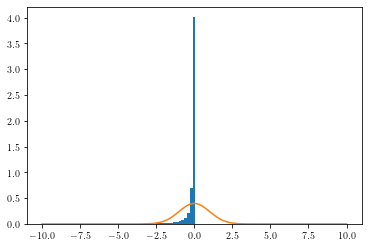

In [11]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

# plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
# xs = np.linspace(-10, 10, 100)
# plt.plot(xs, gauss(xs, 0, 1))

nsigma = (adf.vx_inferred.values - adf.vx.values)/adf.vx_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vy_inferred.values - adf.vy.values)/adf.vy_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vz_inferred.values - adf.vz.values)/adf.vz_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.lndistance_inferred.values - np.log(1./adf.parallax.values))/adf.lndistance_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

plt.clf()
plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
xs = np.linspace(-10, 10, 100)
plt.plot(xs, gauss(xs, 0, 1))

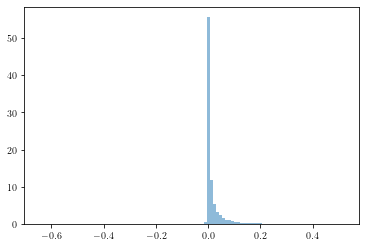

In [72]:
# plt.hist(adf.lndistance_inferred.values, density=True, alpha=.5);
# plt.hist(np.log(1/adf.parallax.values), density=True, alpha=.5);
plt.hist(np.log(1/adf.parallax.values) - adf.lndistance_inferred.values, 100, density=True, alpha=.5);

In [42]:
p = np.zeros(len(adf))
from tqdm import trange
for i in trange(len(adf)):
    cov = [[adf.vx_inferred_err.values[i]**2, 0, 0, 0],
           [0, adf.vy_inferred_err.values[i]**2, 0, 0],
           [0, 0, adf.vz_inferred_err.values[i]**2, 0],
           [0, 0, 0, adf.lndistance_inferred_err.values[i]**2]]
    mvn = multivariate_normal([adf.vx_inferred.values[i], adf.vy_inferred.values[i],
                               adf.vz_inferred.values[i], adf.lndistance_inferred.values[i]], cov)
    p[i] = mvn.pdf([adf.vx.values[i], adf.vy.values[i], adf.vz.values[i], np.log(adf.r_est.values[i]*1e-3)])

100%|██████████| 4987/4987 [00:01<00:00, 3577.65it/s]


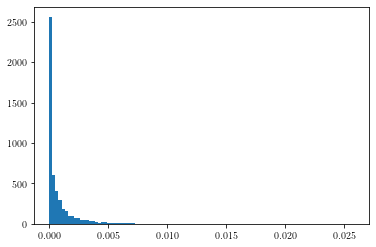

In [43]:
plt.hist(p, 100);

In [41]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

0.24197072451914337


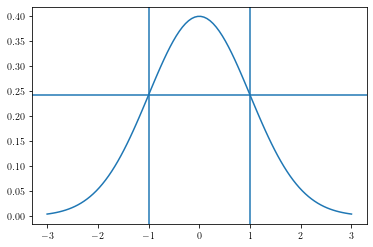

In [44]:
xs = np.linspace(-3, 3, 100)
plt.plot(xs, gauss(xs, 0, 1))
plt.axvline(1)
plt.axvline(-1)
plt.axhline(gauss(1., 0., 1.))
print(gauss(1., 0., 1.))